Epoch 1/100
99/99 - 2s - loss: 0.7591 - 2s/epoch - 21ms/step
Epoch 2/100
99/99 - 0s - loss: 0.3648 - 186ms/epoch - 2ms/step
Epoch 3/100
99/99 - 0s - loss: 0.1332 - 178ms/epoch - 2ms/step
Epoch 4/100
99/99 - 0s - loss: 0.1013 - 173ms/epoch - 2ms/step
Epoch 5/100
99/99 - 0s - loss: 0.1019 - 181ms/epoch - 2ms/step
Epoch 6/100
99/99 - 0s - loss: 0.1003 - 175ms/epoch - 2ms/step
Epoch 7/100
99/99 - 0s - loss: 0.0999 - 175ms/epoch - 2ms/step
Epoch 8/100
99/99 - 0s - loss: 0.0988 - 209ms/epoch - 2ms/step
Epoch 9/100
99/99 - 0s - loss: 0.0990 - 176ms/epoch - 2ms/step
Epoch 10/100
99/99 - 0s - loss: 0.1007 - 222ms/epoch - 2ms/step
Epoch 11/100
99/99 - 0s - loss: 0.1009 - 302ms/epoch - 3ms/step
Epoch 12/100
99/99 - 0s - loss: 0.0999 - 303ms/epoch - 3ms/step
Epoch 13/100
99/99 - 0s - loss: 0.0994 - 454ms/epoch - 5ms/step
Epoch 14/100
99/99 - 0s - loss: 0.1001 - 432ms/epoch - 4ms/step
Epoch 15/100
99/99 - 0s - loss: 0.0988 - 268ms/epoch - 3ms/step
Epoch 16/100
99/99 - 0s - loss: 0.1013 - 284ms/epoc

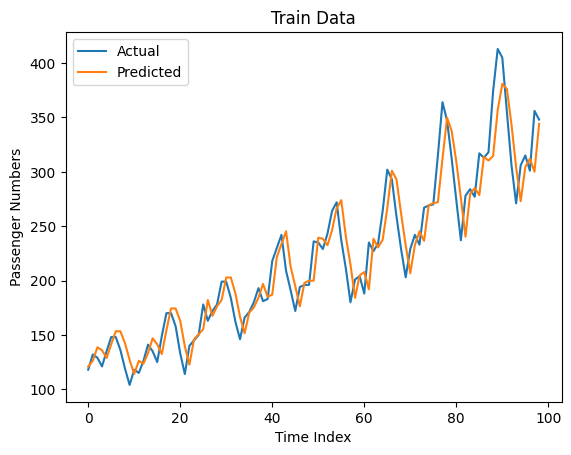

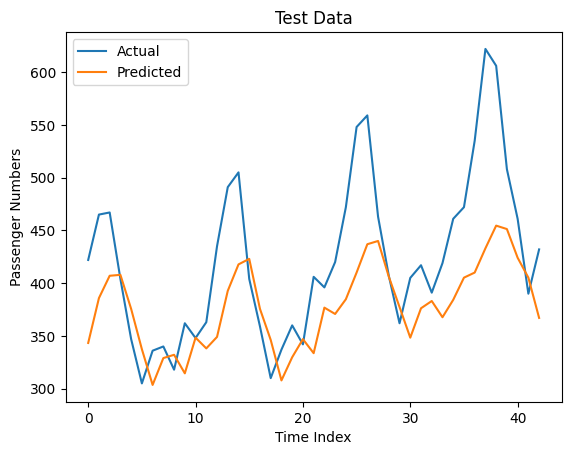

In [ ]:
# Step 1: Importing the required libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the dataset from Kaggle using Pandas
dataset = pd.read_csv('/airline_passengers.csv', usecols=[1], engine='python')
data = dataset.values.astype('float32')

# Step 3: Preprocessing the data
train_data = data[0:int(len(data)*0.7)]
test_data = data[int(len(data)*0.7):len(data)]

# Normalize the data
mean = np.mean(train_data)
std = np.std(train_data)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

# Convert data into time series dataset
def create_dataset(data):
    x = []
    y = []
    for i in range(len(data)-1):
        x.append(data[i])
        y.append(data[i+1])
    return np.array(x), np.array(y)

train_x, train_y = create_dataset(train_data)
test_x, test_y = create_dataset(test_data)

# Reshape the data for LSTM layers
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))

# Step 5: Define the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(1, 1)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Step 6: Train the model
history = model.fit(train_x, train_y, epochs=100, batch_size=1, verbose=2)

# Step 7: Evaluate the model
train_loss = model.evaluate(train_x, train_y, verbose=0)
test_loss = model.evaluate(test_x, test_y, verbose=0)
print(f'Train Loss: {train_loss:.4f}')
print(f'Test Loss: {test_loss:.4f}')

# Step 8: Make predictions
train_predict = model.predict(train_x)
test_predict = model.predict(test_x)

# De-normalize the data
train_predict = (train_predict * std) + mean
train_y = (train_y * std) + mean
test_predict = (test_predict * std) + mean
test_y = (test_y * std) + mean

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_y, test_predict))
print(f'RMSE: {rmse:.4f}')

# Plot the results
plt.plot(train_y, label='Actual')
plt.plot(train_predict, label='Predicted')
plt.title('Train Data')
plt.xlabel('Time Index')
plt.ylabel('Passenger Numbers')
plt.legend()
plt.show()

plt.plot(test_y, label='Actual')
plt.plot(test_predict, label='Predicted')
plt.title('Test Data')
plt.xlabel('Time Index')
plt.ylabel('Passenger Numbers')
plt.legend()
plt.show()
